In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_excel("/content/baby_smile_marketing_data_with_competitors_2023_2025.xlsx")

# **Understanding the Structure of the data**

In [ ]:
data.shape

(292400, 30)

In [ ]:
data.columns

Index(['date', 'region', 'age_group', 'category', 'brand', 'sales ('0000s)',
       'Revenue', 'spend_tv ('00s)', 'spend_radio', 'spend_ooh',
       'spend_meta_ads ', 'spend_google_ads', 'spend_taboola_ads',
       'spend_programmatic_ads', 'spend_connected_tv', 'spend_email',
       'spend_sms', 'spend_whatsapp_marketing', 'spend_print_ads_newspapers',
       'spend_print_ads_magazines', 'spend_direct_buy',
       'spend_influencer_marketing', 'day_of_week', 'month', 'year', 'quarter',
       'spend_natural_search', 'spend_direct_traffic', 'Total Ad Spend',
       'spend_referral_traffic'],
      dtype='object')

In [ ]:
data = data.rename(columns={
    "spend_tv ('00s)": 'spend_tv',
    "sales ('0000s)": 'sales'
})

In [ ]:
data.dtypes

,0
date,datetime64[ns]
region,object
age_group,object
category,object
brand,object
sales,float64
Revenue,float64
spend_tv,float64
spend_radio,float64
spend_ooh,float64


In [ ]:
data.head()

,date,region,age_group,category,brand,sales,Revenue,spend_tv,spend_radio,spend_ooh,...,spend_direct_buy,spend_influencer_marketing,day_of_week,month,year,quarter,spend_natural_search,spend_direct_traffic,Total Ad Spend,spend_referral_traffic
0,2023-04-01,North,0-6 months,Diaper,BABY SMILE,1080.336510,1.080337e+07,2515.000198,100.554240,518.664847,...,53.610750,126.931875,5,4,2023,2,0,0,1.054234e+06,0
1,2023-04-01,North,0-6 months,Diaper,Kuchela,882.387021,8.823870e+06,1912.345985,88.296979,430.263972,...,42.597488,112.908743,5,4,2023,2,0,0,8.724750e+05,0
2,2023-04-01,North,0-6 months,Diaper,Baby Naughty,1373.399459,1.373399e+07,2316.279506,108.322276,584.589075,...,56.355607,138.219763,5,4,2023,2,0,0,1.121767e+06,0
3,2023-04-01,North,0-6 months,Diaper,Hug Me,1137.004127,1.137004e+07,2127.172231,92.176669,498.397871,...,51.019587,120.305355,5,4,2023,2,0,0,9.630203e+05,0
4,2023-04-01,North,0-6 months,Baby Food,BABY SMILE,915.199893,9.151999e+06,2515.000198,100.554240,518.664847,...,53.610750,126.931875,5,4,2023,2,0,0,1.054234e+06,0


In [ ]:
data.tail()

,date,region,age_group,category,brand,sales,Revenue,spend_tv,spend_radio,spend_ooh,...,spend_direct_buy,spend_influencer_marketing,day_of_week,month,year,quarter,spend_natural_search,spend_direct_traffic,Total Ad Spend,spend_referral_traffic
292395,2025-03-31,North-East,6+ years,Skin Care,Hug Me,813.036302,8.130363e+06,2360.634091,239.554819,296.419916,...,157.659732,134.498412,0,3,2025,1,0,0,643832.263400,0
292396,2025-03-31,North-East,6+ years,Clothes,BABY SMILE,805.956767,8.059568e+06,2559.340963,258.796235,312.417044,...,165.325141,165.210392,0,3,2025,1,0,0,701226.261292,0
292397,2025-03-31,North-East,6+ years,Clothes,Kuchela,549.812296,5.498123e+06,2138.496988,197.946688,246.666911,...,137.726234,115.487477,0,3,2025,1,0,0,587367.163073,0
292398,2025-03-31,North-East,6+ years,Clothes,Baby Naughty,1228.631770,1.228632e+07,2858.832329,275.218368,382.285793,...,191.558717,163.475113,0,3,2025,1,0,0,797528.741960,0
292399,2025-03-31,North-East,6+ years,Clothes,Hug Me,777.485420,7.774854e+06,2360.634091,239.554819,296.419916,...,157.659732,134.498412,0,3,2025,1,0,0,643832.263400,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292400 entries, 0 to 292399
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        292400 non-null  datetime64[ns]
 1   region                      292400 non-null  object        
 2   age_group                   292400 non-null  object        
 3   category                    292400 non-null  object        
 4   brand                       292400 non-null  object        
 5   sales                       292400 non-null  float64       
 6   Revenue                     292400 non-null  float64       
 7   spend_tv                    292400 non-null  float64       
 8   spend_radio                 292400 non-null  float64       
 9   spend_ooh                   292400 non-null  float64       
 10  spend_meta_ads              292400 non-null  float64       
 11  spend_google_ads            292400 non-

In [ ]:
data.describe()

,date,sales,Revenue,spend_tv,spend_radio,spend_ooh,spend_meta_ads,spend_google_ads,spend_taboola_ads,spend_programmatic_ads,...,spend_direct_buy,spend_influencer_marketing,day_of_week,month,year,quarter,spend_natural_search,spend_direct_traffic,Total Ad Spend,spend_referral_traffic
count,292400,292400.000000,2.924000e+05,292400.000000,292400.000000,292400.000000,292400.000000,292400.000000,292400.000000,292400.000000,...,292400.000000,292400.000000,292400.000000,292400.000000,292400.000000,292400.000000,292400.0,292400.0,2.924000e+05,292400.0
mean,2024-03-31 00:00:00,1456.098385,1.456098e+07,3229.520124,156.183055,418.900652,1114.048246,1802.089678,253.736044,672.037886,...,104.627671,293.319585,3.002736,6.519836,2023.746922,2.507524,0.0,0.0,8.617692e+05,0.0
min,2023-04-01 00:00:00,339.848129,3.398481e+06,363.038514,28.681573,0.000000,0.000000,0.000000,0.000000,152.150920,...,8.350715,0.000000,0.000000,1.000000,2023.000000,1.000000,0.0,0.0,2.702746e+05,0.0
25%,2023-09-30 00:00:00,1034.864542,1.034865e+07,1897.173419,103.630858,276.521980,803.852607,1307.636001,168.154578,482.731270,...,56.016406,137.923184,1.000000,4.000000,2023.000000,2.000000,0.0,0.0,6.747436e+05,0.0
50%,2024-03-31 00:00:00,1293.371754,1.293372e+07,2787.085479,139.952125,378.445326,1043.668479,1701.269409,230.394577,623.399660,...,84.822382,226.862999,3.000000,7.000000,2024.000000,3.000000,0.0,0.0,8.239714e+05,0.0
75%,2024-09-30 00:00:00,1691.215755,1.691216e+07,4060.039942,189.039314,513.285920,1347.814245,2198.225048,315.963366,804.969538,...,127.646019,372.594917,5.000000,10.000000,2024.000000,4.000000,0.0,0.0,1.004852e+06,0.0
max,2025-03-31 00:00:00,16688.544192,1.668854e+08,19130.246643,811.805024,2123.342518,4089.769741,6407.944687,1033.507795,2283.899811,...,848.365688,2748.222795,6.000000,12.000000,2025.000000,4.000000,0.0,0.0,2.566873e+06,0.0
std,NaN,653.896915,6.538969e+06,1900.765652,77.323893,208.898023,449.879640,745.933216,122.118827,264.031754,...,75.590599,238.658915,2.003419,3.449557,0.659749,1.117399,0.0,0.0,2.621851e+05,0.0


# **Cleaning the data**

In [ ]:
data.isnull().sum()

,0
date,0
region,0
age_group,0
category,0
brand,0
sales,0
Revenue,0
spend_tv,0
spend_radio,0
spend_ooh,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,date,region,age_group,category,brand,sales,Revenue,spend_tv,spend_radio,spend_ooh,...,spend_direct_buy,spend_influencer_marketing,day_of_week,month,year,quarter,spend_natural_search,spend_direct_traffic,Total Ad Spend,spend_referral_traffic
0,2023-04-01,North,0-6 months,Diaper,BABY SMILE,1080.336510,1.080337e+07,2515.000198,100.554240,518.664847,...,53.610750,126.931875,5,4,2023,2,0,0,1.054234e+06,0
1,2023-04-01,North,0-6 months,Diaper,Kuchela,882.387021,8.823870e+06,1912.345985,88.296979,430.263972,...,42.597488,112.908743,5,4,2023,2,0,0,8.724750e+05,0
2,2023-04-01,North,0-6 months,Diaper,Baby Naughty,1373.399459,1.373399e+07,2316.279506,108.322276,584.589075,...,56.355607,138.219763,5,4,2023,2,0,0,1.121767e+06,0
3,2023-04-01,North,0-6 months,Diaper,Hug Me,1137.004127,1.137004e+07,2127.172231,92.176669,498.397871,...,51.019587,120.305355,5,4,2023,2,0,0,9.630203e+05,0
4,2023-04-01,North,0-6 months,Baby Food,BABY SMILE,915.199893,9.151999e+06,2515.000198,100.554240,518.664847,...,53.610750,126.931875,5,4,2023,2,0,0,1.054234e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292395,2025-03-31,North-East,6+ years,Skin Care,Hug Me,813.036302,8.130363e+06,2360.634091,239.554819,296.419916,...,157.659732,134.498412,0,3,2025,1,0,0,6.438323e+05,0
292396,2025-03-31,North-East,6+ years,Clothes,BABY SMILE,805.956767,8.059568e+06,2559.340963,258.796235,312.417044,...,165.325141,165.210392,0,3,2025,1,0,0,7.012263e+05,0
292397,2025-03-31,North-East,6+ years,Clothes,Kuchela,549.812296,5.498123e+06,2138.496988,197.946688,246.666911,...,137.726234,115.487477,0,3,2025,1,0,0,5.873672e+05,0
292398,2025-03-31,North-East,6+ years,Clothes,Baby Naughty,1228.631770,1.228632e+07,2858.832329,275.218368,382.285793,...,191.558717,163.475113,0,3,2025,1,0,0,7.975287e+05,0


# **Truncating the data**

In [ ]:
start_date = '2024-09-01'
end_date = '2025-03-01'

mask = (data['date'] >= start_date) & (data['date'] <= end_date)
filtered_data = data.loc[mask]

In [ ]:
filtered_data.columns

Index(['date', 'region', 'age_group', 'category', 'brand', 'sales', 'Revenue',
       'spend_tv', 'spend_radio', 'spend_ooh', 'spend_meta_ads ',
       'spend_google_ads', 'spend_taboola_ads', 'spend_programmatic_ads',
       'spend_connected_tv', 'spend_email', 'spend_sms',
       'spend_whatsapp_marketing', 'spend_print_ads_newspapers',
       'spend_print_ads_magazines', 'spend_direct_buy',
       'spend_influencer_marketing', 'day_of_week', 'month', 'year', 'quarter',
       'spend_natural_search', 'spend_direct_traffic', 'Total Ad Spend',
       'spend_referral_traffic'],
      dtype='object')

# **Solving the Problem Statements**

## **Marketing Effectiveness & ROI Analysis**

### Which marketing channels deliver the highest ROI for each product category (diapers, baby food, skin care, clothes)?

In [ ]:
def probstatement1():
  # Prep + ROI computation
  top_channels = (
      filtered_data.assign(category=lambda d: d['category'].str.lower())
      .melt(id_vars=['category', 'Revenue'],
            value_vars=[c for c in filtered_data.columns if c.startswith('spend_') and 'total' not in c],
            var_name='channel', value_name='spend')
      .query('spend > 0')
      .groupby(['category', 'channel'], as_index=False)
      .sum()
      .assign(roi=lambda d: (d['Revenue'] - d['spend']) / d['spend'])
      .loc[lambda d: d.groupby('category')['roi'].idxmax()]
  )

  # Display top channels by ROI
  print(top_channels[['category', 'channel', 'roi']])

  # 📊 Plot
  plt.figure(figsize=(10, 6))
  sns.barplot(data=top_channels, x='category', y='roi', hue='channel', dodge=False)
  plt.title('Top ROI Marketing Channel per Product Category')
  plt.ylabel('ROI')
  plt.xlabel('Product Category')
  plt.xticks(rotation=30)
  plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

### How does adstock decay vary across digital vs. traditional media for our brand?

In [ ]:
def probstatement2():
  # --- Compact Adstock Function ---
  def adstock(series, rate):
      return series.cumsum().shift(fill_value=0).mul(rate).add(series.mul(1 - rate))

  # --- Channel Lists ---
  digital = ['spend_meta_ads ', 'spend_google_ads', 'spend_taboola_ads',
            'spend_programmatic_ads', 'spend_connected_tv', 'spend_email',
            'spend_sms', 'spend_whatsapp_marketing', 'spend_natural_search',
            'spend_direct_traffic', 'spend_referral_traffic']

  traditional = ['spend_tv', 'spend_radio', 'spend_ooh', 'spend_print_ads_newspapers',
                'spend_print_ads_magazines', 'spend_direct_buy', 'spend_influencer_marketing']

  # --- Filter Brand Data ---
  brand = 'BABY SMILE'
  df = filtered_data[filtered_data['brand'].str.lower() == brand.lower()].copy()
  if df.empty:
      print(f"No data for brand '{brand}'")
  else:
      df = df.groupby('date')[digital + traditional].sum().sort_index()
      rates = [0.1, 0.3, 0.5, 0.7, 0.9]

      result = pd.DataFrame([{
          'decay': r,
          'digital_total': adstock(df[digital].sum(axis=1), r).sum(),
          'traditional_total': adstock(df[traditional].sum(axis=1), r).sum()
      } for r in rates])

      print(result)

      # --- Plot ---
      plt.figure(figsize=(8, 5))
      plt.plot(result.decay, result.digital_total, label='Digital Media')
      plt.plot(result.decay, result.traditional_total, label='Traditional Media')
      plt.title('Adstock Total vs. Decay Rate')
      plt.xlabel('Decay Rate'); plt.ylabel('Cumulative Adstock')
      plt.legend(); plt.grid(True); plt.tight_layout()
      plt.show()

## **Seasonal Planning**

### What's the optimal pre-monsoon media mix for skin care products in Western India?

In [ ]:
def probstatement3():

  # Filter for West + Skin Care + Pre-monsoon
  df = filtered_data.copy()
  df = df[(df['region'].str.lower() == 'west') &
          (df['category'].str.lower() == 'skin care') &
          (df['month'].isin([3, 4, 5]))]

  # Auto-select spend columns
  spend_cols = [col for col in df.columns if col.startswith('spend_') and 'total' not in col]
  X, y = df[spend_cols].fillna(0), df['Revenue'].fillna(0)

  # Fit model & prepare media mix
  lr = LinearRegression().fit(X, y)
  mix = pd.DataFrame({'channel': spend_cols, 'coef': lr.coef_})
  mix['mix_%'] = 100 * mix['coef'] / mix['coef'].sum()
  mix = mix.sort_values('mix_%', ascending=False)

  # Plot
  plt.figure(figsize=(10, 6))
  sns.barplot(data=mix, x='mix_%', y='channel', palette='viridis')
  plt.title('Optimal Pre-Monsoon Media Mix: Skin Care (West)')
  plt.xlabel('Relative Mix (%)'); plt.ylabel('Channel')
  plt.tight_layout(); plt.show()

### How should we reallocate budgets during Diwali to maximize gifting sales?

In [ ]:
def probstatement4():
  # Filter for Diwali (Oct–Nov) & gifting categories
  df = filtered_data.copy()
  df = df[df['month'].astype(int).isin([10, 11]) &
          df['category'].str.lower().isin(['clothes', 'skin care'])]

  # Select spend columns dynamically
  spend_cols = [c for c in df.columns if c.startswith('spend_') and 'total' not in c]
  X, y = df[spend_cols].fillna(0), df['Revenue'].fillna(0)

  # Fit model & compute recommended allocation
  model = LinearRegression().fit(X, y)
  alloc = pd.DataFrame({'channel': spend_cols, 'effectiveness': model.coef_})
  alloc['alloc_%'] = 100 * alloc['effectiveness'] / alloc['effectiveness'].sum()
  alloc = alloc.sort_values('alloc_%', ascending=False)

  # Plot
  plt.figure(figsize=(12, 6))
  sns.barplot(data=alloc, x='alloc_%', y='channel', palette='Spectral')
  plt.title('Diwali Budget Allocation for Gifting Sales')
  plt.xlabel('Recommended Allocation (%)'); plt.ylabel('Channel')
  plt.tight_layout(); plt.show()

## **Budget Optimization**

### If we need to cut 20% from marketing budget, which channels should we protect?

In [ ]:
def probstatement5():

  # Prepare data
  df = filtered_data.copy()
  df.columns = df.columns.str.strip().str.lower()

  spend_cols = [c for c in df.columns if c.startswith('spend_') and 'total' not in c]

  # Calculate ROI per channel
  roi_df = pd.DataFrame([{
      'channel': ch,
      'total_spend': df[ch].sum(),
      'total_revenue': df[df[ch] > 0]['revenue'].sum()
  } for ch in spend_cols if df[ch].sum() > 0])

  roi_df['ROI'] = (roi_df['total_revenue'] - roi_df['total_spend']) / roi_df['total_spend']
  roi_df = roi_df.sort_values('ROI', ascending=False).reset_index(drop=True)

  # Mark top 80% spend as "protect"
  roi_df['cumulative_spend_pct'] = roi_df['total_spend'].cumsum() / roi_df['total_spend'].sum()
  roi_df['protect'] = roi_df['cumulative_spend_pct'] <= 0.8

  # Output
  print("✅ Channels to PROTECT:\n", roi_df[roi_df['protect']][['channel', 'ROI', 'total_spend']])
  print("\n⚠️ Channels to CONSIDER CUTTING:\n", roi_df[~roi_df['protect']][['channel', 'ROI', 'total_spend']])

  # Plot
  plt.figure(figsize=(12, 6))
  sns.barplot(data=roi_df, x='ROI', y='channel', hue='protect', dodge=False, palette={True: 'green', False: 'red'})
  plt.title('ROI by Channel — Protect (Green) vs. Cut (Red)')
  plt.xlabel('ROI'); plt.ylabel('Channel'); plt.tight_layout(); plt.show()

### What's the ideal spend allocation between performance vs. brand-building channels?

In [ ]:
def probstatement6():
  # Prep data
  df = filtered_data.copy()
  df.columns = df.columns.str.strip().str.lower()

  perf_channels = [
      'spend_google_ads', 'spend_meta_ads', 'spend_email', 'spend_sms',
      'spend_whatsapp_marketing', 'spend_taboola_ads',
      'spend_direct_traffic', 'spend_natural_search', 'spend_referral_traffic'
  ]
  brand_channels = [
      'spend_tv', 'spend_radio', 'spend_ooh', 'spend_connected_tv',
      'spend_print_ads_newspapers', 'spend_print_ads_magazines',
      'spend_direct_buy', 'spend_influencer_marketing', 'spend_programmatic_ads'
  ]

  # Spend & revenue
  def calc_roi(channels):
      spend = df[channels].sum().sum()
      revenue = df[df[channels].sum(axis=1) > 0]['revenue'].sum()
      roi = (revenue - spend) / spend if spend else 0
      return spend, roi

  perf_spend, perf_roi = calc_roi(perf_channels)
  brand_spend, brand_roi = calc_roi(brand_channels)
  total_spend = perf_spend + brand_spend

  # Ideal allocation
  total_roi = perf_roi + brand_roi
  perf_ideal = perf_roi / total_roi if total_roi > 0 else 0.5
  brand_ideal = 1 - perf_ideal

  # Print summary
  print(f"Current Allocation:\n Performance: ₹{perf_spend:,.0f} ({perf_spend/total_spend:.1%})"
        f"\n Brand: ₹{brand_spend:,.0f} ({brand_spend/total_spend:.1%})")
  print(f"\nROI:\n Performance: {perf_roi:.2f}\n Brand: {brand_roi:.2f}")
  print(f"\nSuggested Allocation:\n Performance: {perf_ideal:.1%}\n Brand: {brand_ideal:.1%}")

  # Plot
  plt.figure(figsize=(8, 5))
  x = [0, 1]; width = 0.35
  plt.bar(x, [perf_spend, brand_spend], width=width, label='Current', color='skyblue', bottom=0)
  plt.bar([i + width for i in x], [perf_ideal * total_spend, brand_ideal * total_spend],
          width=width, label='Ideal', color='orange')
  plt.xticks([i + width/2 for i in x], ['Performance', 'Brand'])
  plt.ylabel("Spend")
  plt.title("Current vs Ideal Budget Allocation")
  plt.legend(); plt.tight_layout(); plt.show()

### Which item (category) generates the highest revenue?
### Which brand generates the highest revenue?
### Brand vs Item (category): A comparison of total revenue across combinations.

In [ ]:
def probstatement7():

  # Clean column names
  df = filtered_data.copy()
  df.columns = df.columns.str.strip().str.lower()

  # 1. Which item (category) generates high revenue?
  top_category = df.groupby('category')['revenue'].sum().sort_values(ascending=False).reset_index()
  print("Top Revenue-Generating Categories:")
  print(top_category)

  # 2. Which brand generates high revenue?
  top_brand = df.groupby('brand')['revenue'].sum().sort_values(ascending=False).reset_index()
  print("\nTop Revenue-Generating Brands:")
  print(top_brand)

  # 3. Brand vs Item revenue pivot
  brand_item = df.groupby(['brand', 'category'])['revenue'].sum().reset_index()
  pivot_table = brand_item.pivot(index='brand', columns='category', values='revenue').fillna(0)

  print("\nBrand vs Category Revenue Table:")
  print(pivot_table)

  # Optional: Heatmap for visual comparison
  plt.figure(figsize=(12, 6))
  sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
  plt.title("Brand vs Category Revenue")
  plt.ylabel("Brand")
  plt.xlabel("Category")
  plt.tight_layout()
  plt.show()

     category    channel            roi
11  baby food  spend_sms  429916.237735
26    clothes  spend_sms  426269.327167
41     diaper  spend_sms  367235.149655
56  skin care  spend_sms  557286.098172


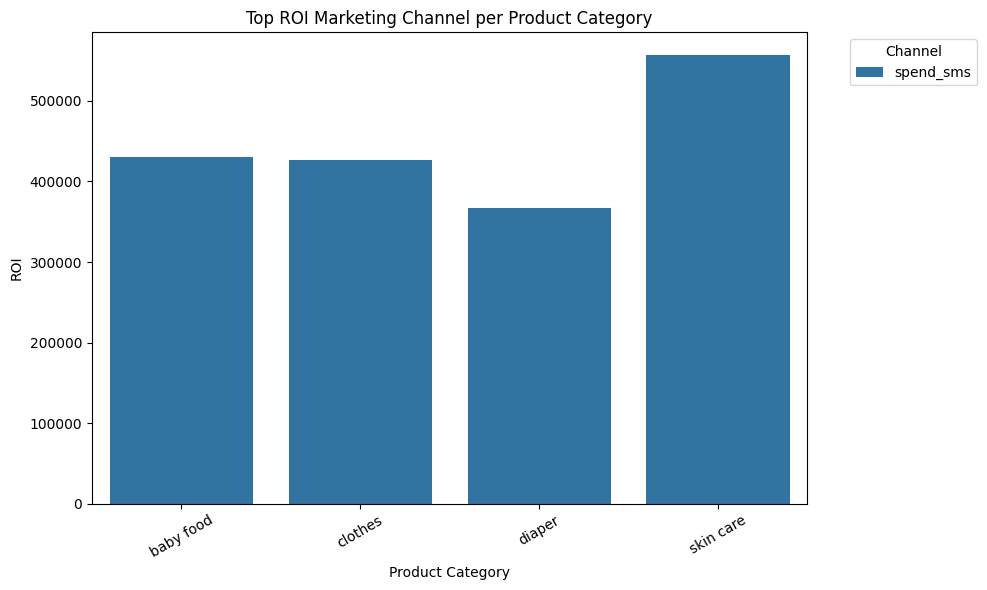

   decay  digital_total  traditional_total
0    0.1   7.797773e+08       7.975894e+08
1    0.3   2.180799e+09       2.228801e+09
2    0.5   3.581821e+09       3.660013e+09
3    0.7   4.982842e+09       5.091225e+09
4    0.9   6.383864e+09       6.522436e+09


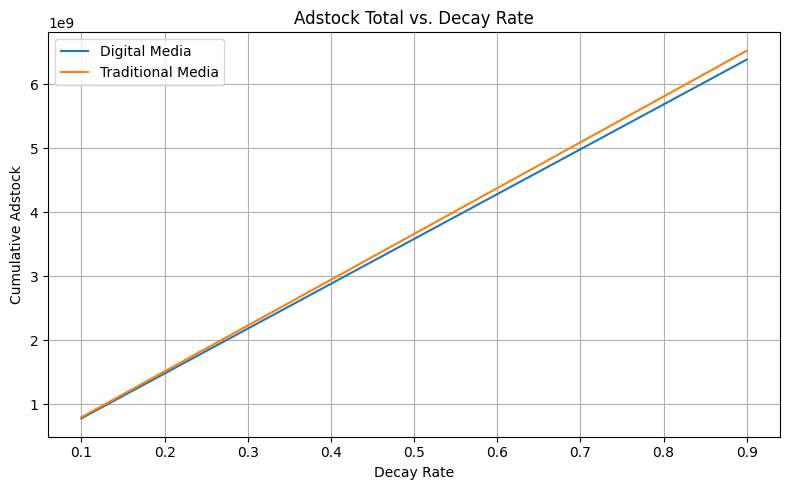

<ipython-input-18-e72c68ea57c5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mix, x='mix_%', y='channel', palette='viridis')


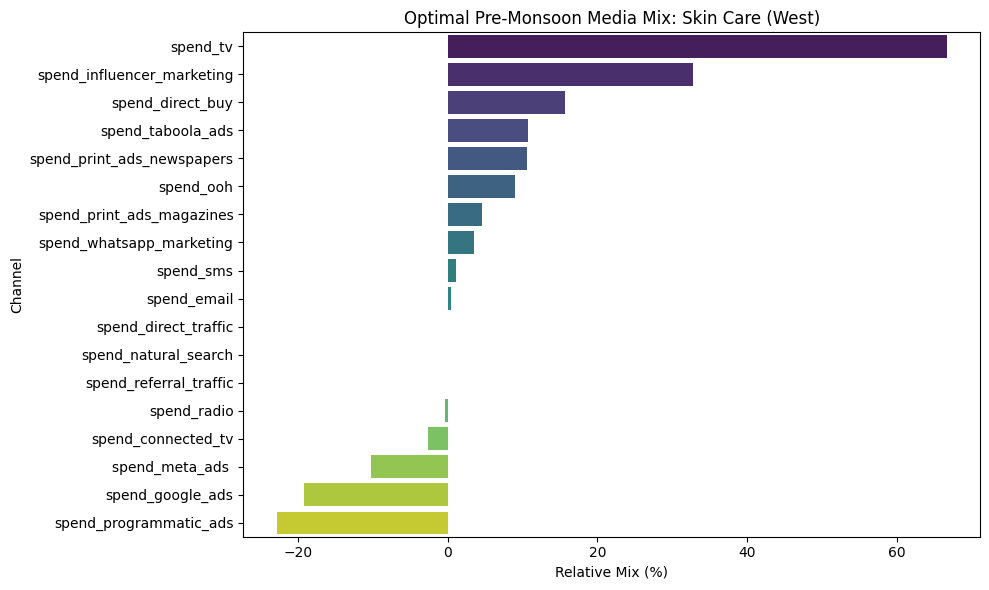

<ipython-input-19-df588cbb7212>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=alloc, x='alloc_%', y='channel', palette='Spectral')


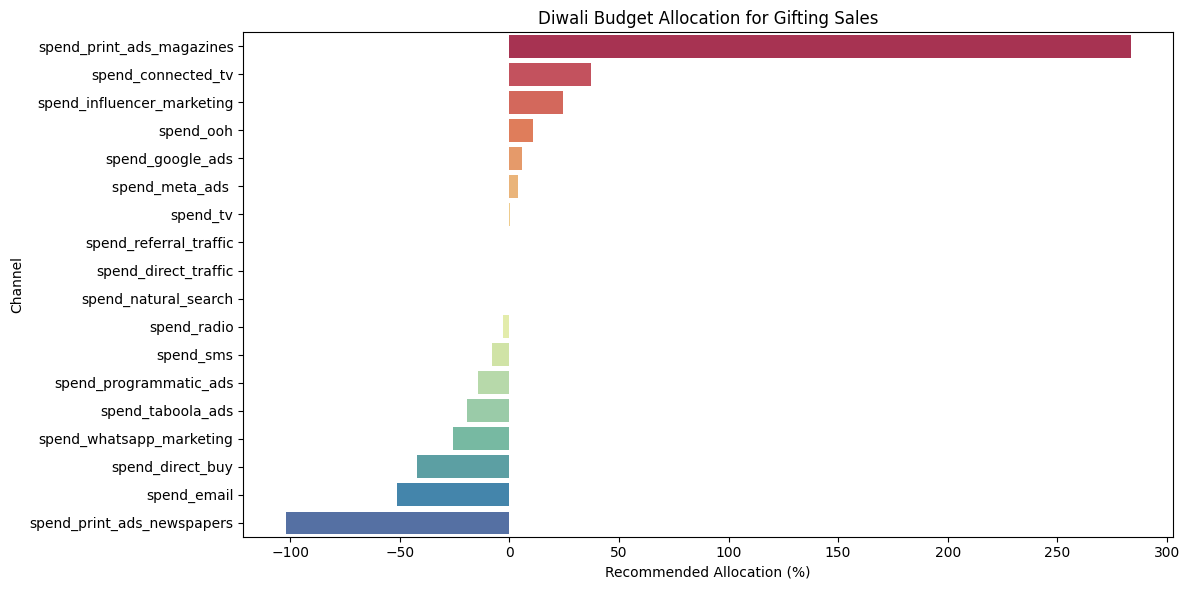

✅ Channels to PROTECT:
                        channel            ROI   total_spend
0                    spend_sms  445176.703182  2.469019e+06
1                  spend_email  263867.579334  4.165528e+06
2    spend_print_ads_magazines  256906.010611  4.278404e+06
3     spend_whatsapp_marketing  161215.485073  6.260358e+06
4             spend_direct_buy  147660.328770  7.443736e+06
5                  spend_radio   96121.585826  1.143490e+07
6           spend_connected_tv   95669.569812  1.148892e+07
7   spend_print_ads_newspapers   92943.607477  1.138781e+07
8            spend_taboola_ads   59036.789889  1.861777e+07
9   spend_influencer_marketing   50762.099590  2.165258e+07
10                   spend_ooh   35144.380272  3.127444e+07
11      spend_programmatic_ads   22591.508472  4.865117e+07
12              spend_meta_ads   13207.574667  8.321503e+07
13            spend_google_ads    8305.221809  1.264100e+08

⚠️ Channels to CONSIDER CUTTING:
      channel          ROI   total_spend
1

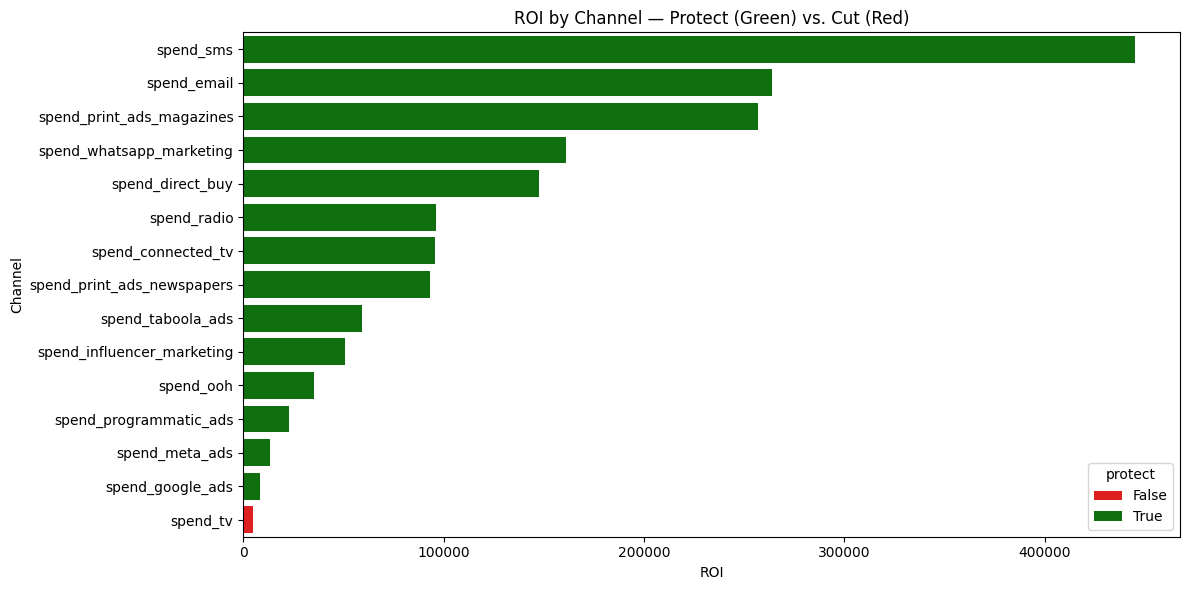

Current Allocation:
 Performance: ₹241,137,752 (39.3%)
 Brand: ₹372,366,559 (60.7%)

ROI:
 Performance: 4557.19
 Brand: 2950.80

Suggested Allocation:
 Performance: 60.7%
 Brand: 39.3%


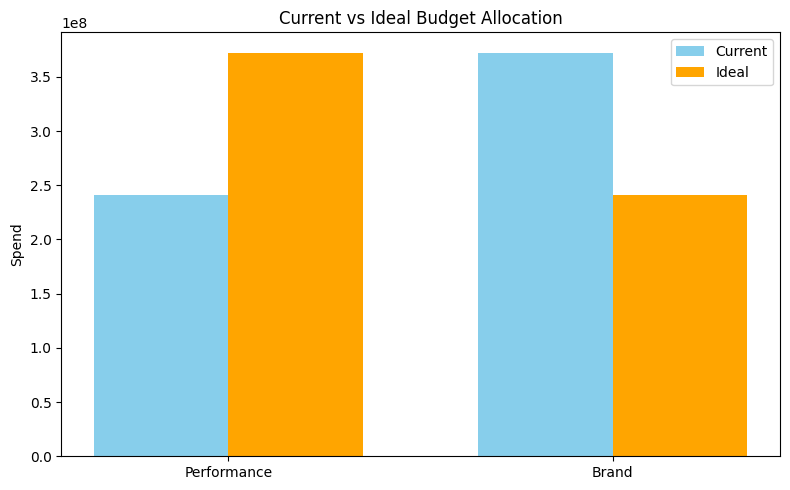

Top Revenue-Generating Categories:
    category       revenue
0  Skin Care  3.439880e+11
1  Baby Food  2.653684e+11
2    Clothes  2.631173e+11
3     Diaper  2.266782e+11

Top Revenue-Generating Brands:
          brand       revenue
0  Baby Naughty  3.345580e+11
1    BABY SMILE  2.817221e+11
2        Hug Me  2.516877e+11
3       Kuchela  2.311842e+11

Brand vs Category Revenue Table:
category         Baby Food       Clothes        Diaper     Skin Care
brand                                                               
BABY SMILE    6.688723e+10  6.538775e+10  5.966828e+10  8.977880e+10
Baby Naughty  8.337382e+10  8.207783e+10  6.627881e+10  1.028276e+11
Hug Me        5.921696e+10  6.023759e+10  5.372075e+10  7.851241e+10
Kuchela       5.589038e+10  5.541416e+10  4.701037e+10  7.286927e+10


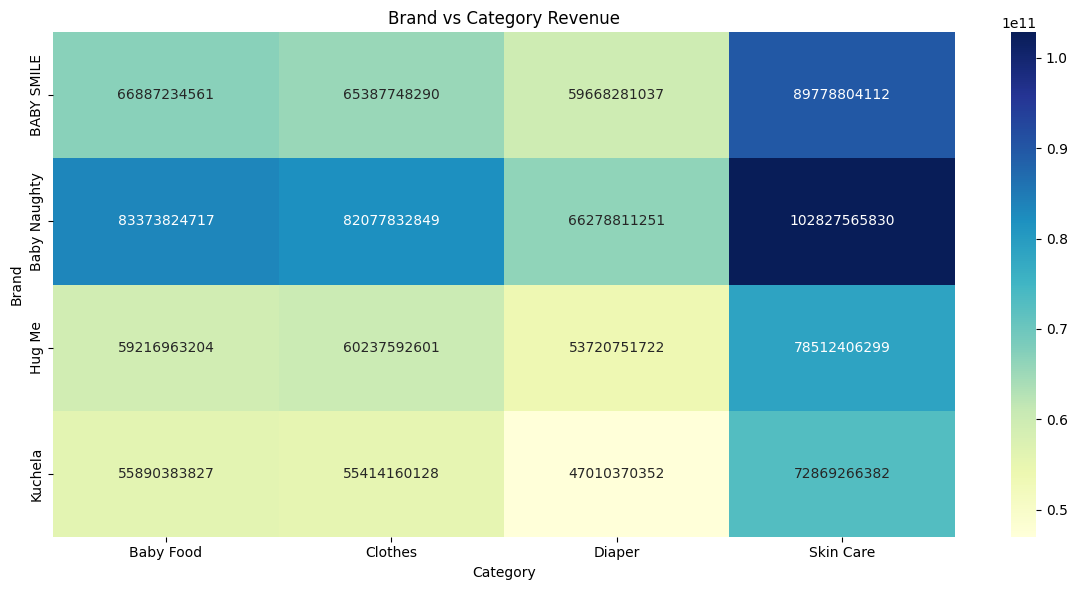

In [ ]:
probstatement1()
probstatement2()
probstatement3()
probstatement4()
probstatement5()
probstatement6()
probstatement7()


## Contribution of Each Category to Total Revenue

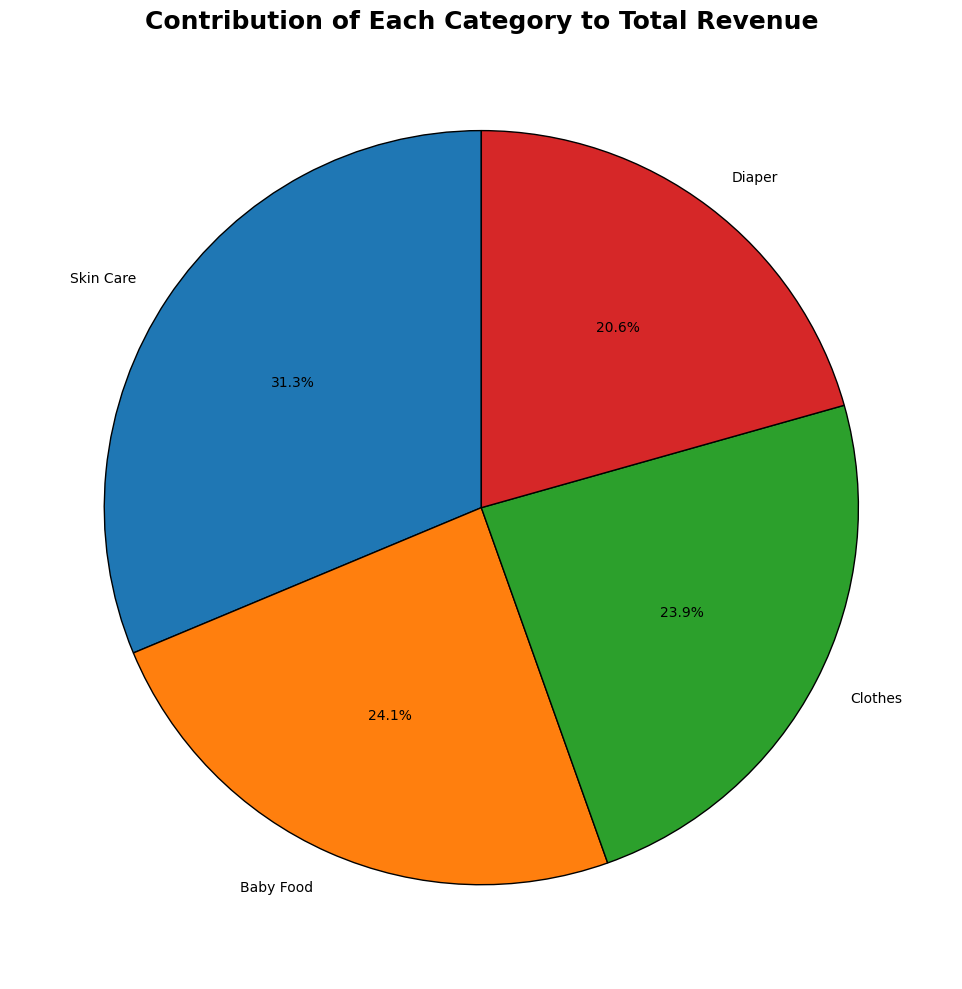

In [ ]:
# Group total revenue by category
category_revenue = filtered_data.groupby('category')['Revenue'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    category_revenue,
    labels=category_revenue.index.str.title(),
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Contribution of Each Category to Total Revenue', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


## Contribution of Each Brand to Total Revenue

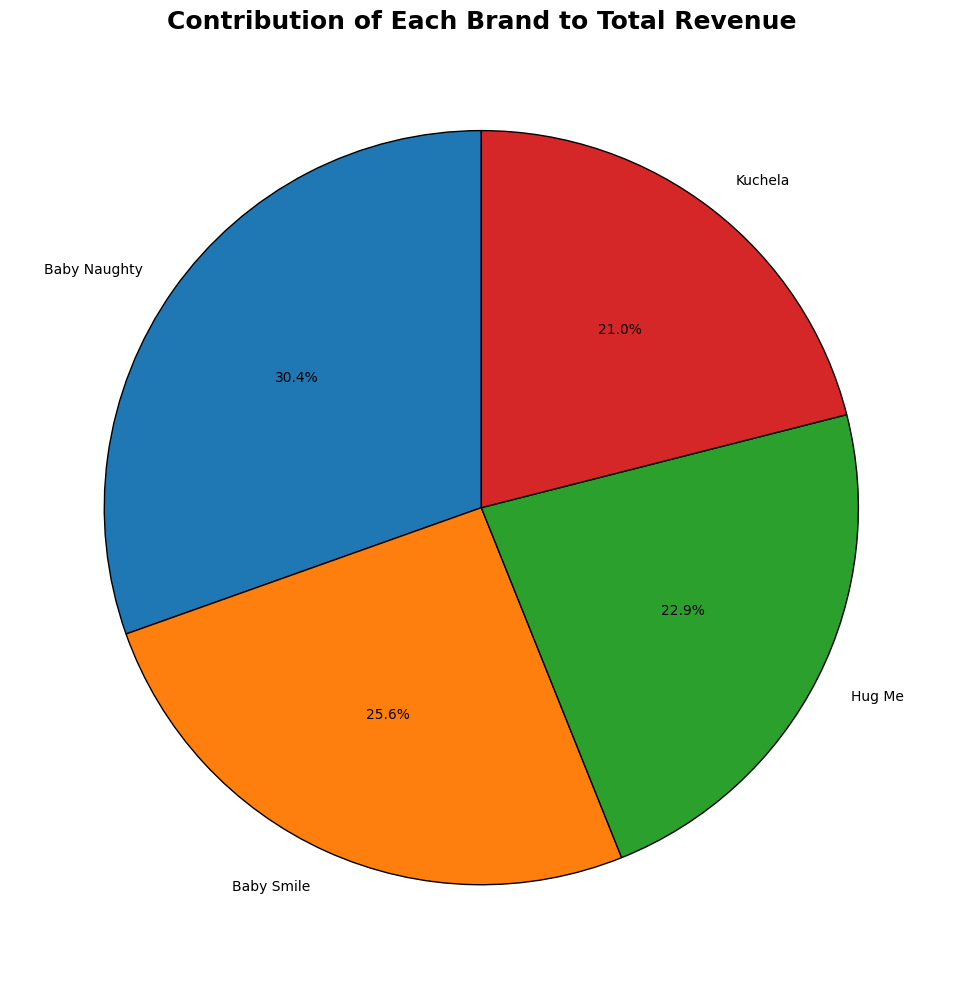

In [ ]:
# Group total revenue by brand
brand_revenue = filtered_data.groupby('brand')['Revenue'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    brand_revenue,
    labels=brand_revenue.index.str.title(),
    startangle=90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Contribution of Each Brand to Total Revenue', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


## top 5 ad platforms

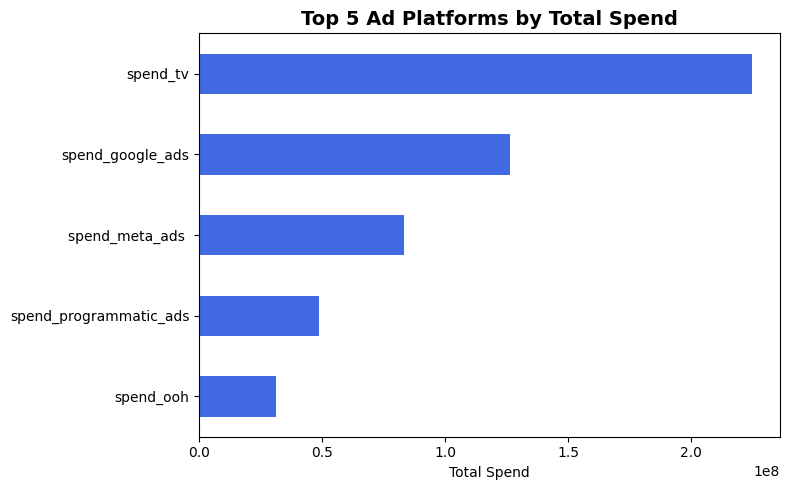

In [ ]:
# Define ad platform spend columns
ad_platforms = [
    'spend_tv', 'spend_radio', 'spend_ooh', 'spend_meta_ads ', 'spend_google_ads',
    'spend_taboola_ads', 'spend_programmatic_ads', 'spend_connected_tv', 'spend_email',
    'spend_sms', 'spend_whatsapp_marketing', 'spend_print_ads_newspapers',
    'spend_print_ads_magazines', 'spend_direct_buy', 'spend_influencer_marketing',
    'spend_natural_search', 'spend_direct_traffic', 'spend_referral_traffic'
]

# Sum spend per platform
platform_spend = filtered_data[ad_platforms].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
platform_spend.plot(kind='barh', color='royalblue')
plt.title("Top 5 Ad Platforms by Total Spend", fontsize=14, fontweight='bold')
plt.xlabel("Total Spend")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
